Lab 1

Импорт

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

1. Нормальное распределение

ТЕОРЕТИЧЕСКИЕ ПАРАМЕТРЫ:
  μ = 4
  σ = 2

ВЫБОРОЧНЫЕ ПАРАМЕТРЫ:
  mat. ожидание выборки = 3.9538
  стандартное отклонение выборки = 2.0049


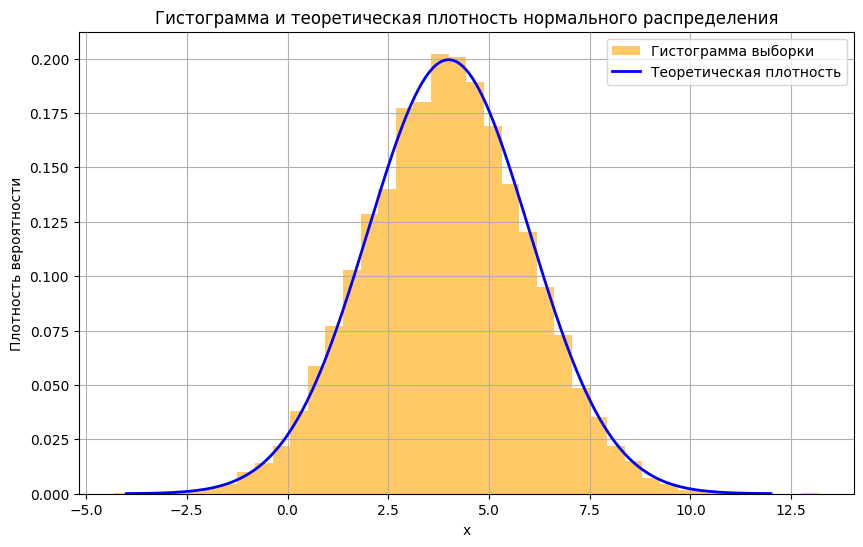


ВЕРОЯТНОСТИ ПОПАДАНИЯ В ИНТЕРВАЛЫ:
  P(|X - μ| < 1σ) = 0.682689
  P(|X - μ| < 2σ) = 0.954500
  P(|X - μ| < 3σ) = 0.997300


In [2]:

# ===============================
# 1. Параметры нормального распределения
# ===============================
mu = 4         # математическое ожидание
sigma = 2       # стандартное отклонение

# ===============================
# 2. Генерация выборки
# ===============================
np.random.seed(23)
N = 10000
data = np.random.normal(mu, sigma, N)

# ===============================
# 3. Выборочные характеристики
# ===============================
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

print("ТЕОРЕТИЧЕСКИЕ ПАРАМЕТРЫ:")
print(f"  μ = {mu}")
print(f"  σ = {sigma}")

print("\nВЫБОРОЧНЫЕ ПАРАМЕТРЫ:")
print(f"  mat. ожидание выборки = {sample_mean:.4f}")
print(f"  стандартное отклонение выборки = {sample_std:.4f}")

# ===============================
# 4. Гистограмма + теоретическая плотность
# ===============================
plt.figure(figsize=(10, 6))
plt.hist(data, bins=40, density=True, color='orange', alpha=0.6, label="Гистограмма выборки")

# теоретическая плотность
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'b', linewidth=2, label="Теоретическая плотность")

plt.title("Гистограмма и теоретическая плотность нормального распределения")
plt.xlabel("x")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# 5. Вероятности попадания в интервалы
# ===============================
p1 = norm.cdf(mu + sigma, mu, sigma) - norm.cdf(mu - sigma, mu, sigma)
p2 = norm.cdf(mu + 2*sigma, mu, sigma) - norm.cdf(mu - 2*sigma, mu, sigma)
p3 = norm.cdf(mu + 3*sigma, mu, sigma) - norm.cdf(mu - 3*sigma, mu, sigma)

print("\nВЕРОЯТНОСТИ ПОПАДАНИЯ В ИНТЕРВАЛЫ:")
print(f"  P(|X - μ| < 1σ) = {p1:.6f}")
print(f"  P(|X - μ| < 2σ) = {p2:.6f}")
print(f"  P(|X - μ| < 3σ) = {p3:.6f}")

2. Биномиальное распределение как сумма Бернулли

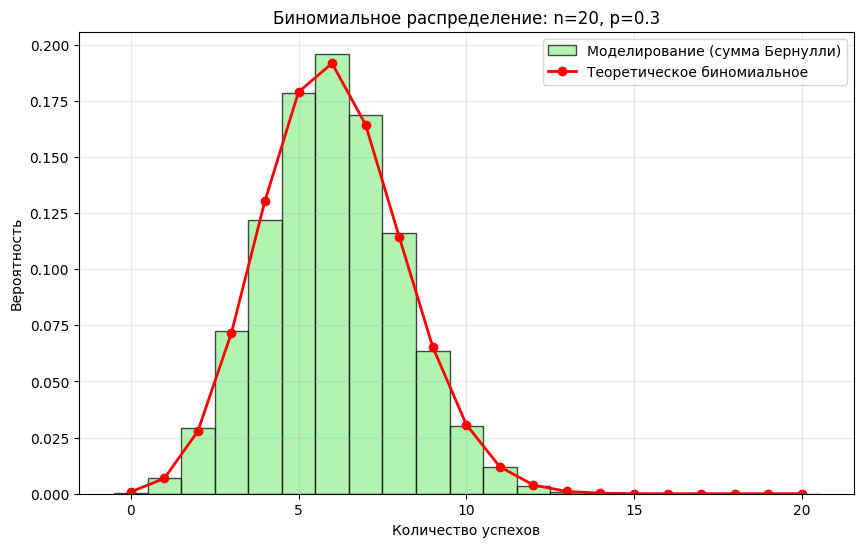


=== БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ ===
Параметры: n=20, p=0.3
Выборочное среднее: 6.0096
Теоретическое среднее (n*p): 6.0000
Выборочная дисперсия: 4.1489
Теоретическая дисперсия (n*p*(1-p)): 4.2000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2

# Биномиальное распределение как сумма Бернулли
np.random.seed(42)
n = 20  # количество испытаний
p = 0.3  # вероятность успеха
n_samples = 10000  # количество выборок

# Моделирование биномиальной СВ как суммы Бернулли
binomial_samples = np.zeros(n_samples)
for i in range(n_samples):
    # Сумма n независимых испытаний Бернулли
    bernoulli_trials = np.random.binomial(1, p, n)
    binomial_samples[i] = np.sum(bernoulli_trials)

# Теоретическое биномиальное распределение
x = np.arange(0, n+1)
theoretical_probs = stats.binom.pmf(x, n, p)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(binomial_samples, bins=np.arange(-0.5, n+1.5, 1), density=True,
         alpha=0.7, color='lightgreen', edgecolor='black',
         label='Моделирование (сумма Бернулли)')

# Теоретические вероятности
plt.plot(x, theoretical_probs, 'ro-', linewidth=2, markersize=6,
         label='Теоретическое биномиальное')

plt.title(f'Биномиальное распределение: n={n}, p={p}')
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Сравнение выборочных и теоретических характеристик
print("\n=== БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ ===")
print(f"Параметры: n={n}, p={p}")
print(f"Выборочное среднее: {np.mean(binomial_samples):.4f}")
print(f"Теоретическое среднее (n*p): {n*p:.4f}")
print(f"Выборочная дисперсия: {np.var(binomial_samples):.4f}")
print(f"Теоретическая дисперсия (n*p*(1-p)): {n*p*(1-p):.4f}")

3. Экспоненциальное распределение через U(0,1)

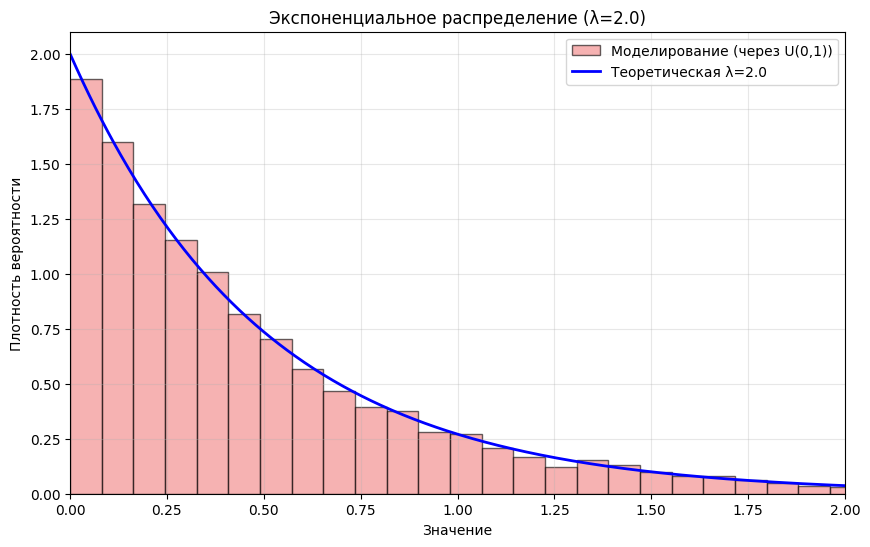


=== ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ ===
Параметр λ: 2.0
Выборочное среднее: 0.4887
Теоретическое среднее (1/λ): 0.5000
Выборочное стандартное отклонение: 0.4872
Теоретическое стандартное отклонение (1/λ): 0.5000


In [9]:
# Экспоненциальное распределение через обратную функцию
np.random.seed(42)
lambd = 2.0  # параметр λ (интенсивность)
n_samples = 10000

# Генерация равномерного распределения
U = np.random.uniform(0, 1, n_samples)

# Преобразование в экспоненциальное распределение
# F⁻¹(u) = -ln(1-u)/λ
data_exp = -np.log(1 - U) / lambd

# Построение гистограммы
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(data_exp, bins=50, density=True, alpha=0.6,
                          color='lightcoral', edgecolor='black',
                          label='Моделирование (через U(0,1))')

# Теоретическая плотность
x = np.linspace(0, np.max(data_exp), 1000)
pdf_exp = stats.expon.pdf(x, scale=1/lambd)
plt.plot(x, pdf_exp, 'b-', linewidth=2, label=f'Теоретическая λ={lambd}')

plt.title(f'Экспоненциальное распределение (λ={lambd})')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 4/lambd)  # Ограничиваем для лучшей видимости
plt.show()

# Сравнение характеристик
print("\n=== ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ ===")
print(f"Параметр λ: {lambd}")
print(f"Выборочное среднее: {np.mean(data_exp):.4f}")
print(f"Теоретическое среднее (1/λ): {1/lambd:.4f}")
print(f"Выборочное стандартное отклонение: {np.std(data_exp):.4f}")
print(f"Теоретическое стандартное отклонение (1/λ): {1/lambd:.4f}")

4. Гамма-распределение

=== ГАММА-РАСПРЕДЕЛЕНИЕ ===
Параметры: α=3.0 (форма), β=2.0 (масштаб)
Выборочное среднее: 1.5125
Теоретическое среднее (α/β): 1.5000
Выборочное стандартное отклонение: 0.8564
Теоретическое стандартное отклонение (√(α/β²)): 0.8660


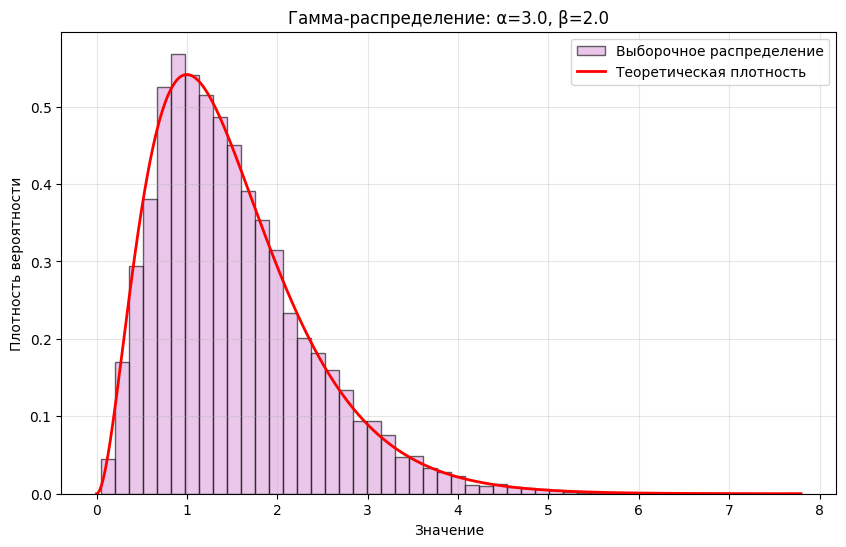


=== СВОЙСТВА ГАММА-РАСПРЕДЕЛЕНИЯ ===
α (форма):
  - α < 1: плотность стремится к бесконечности в 0
  - α = 1: экспоненциальное распределение
  - α > 1: унимодальное распределение
  - α → ∞: приближается к нормальному распределению

β (масштаб):
  - Большее β → меньшее среднее и дисперсия
  - Меньшее β → большее среднее и дисперсия


In [10]:
# Гамма-распределение
np.random.seed(42)
alpha = 3.0  # параметр формы
beta = 2.0   # параметр масштаба (или 1/θ)
n_samples = 10000

# Генерация гамма-распределенной СВ
data_gamma = np.random.gamma(alpha, 1/beta, n_samples)

# Вычисление выборочных характеристик
sample_mean = np.mean(data_gamma)
sample_std = np.std(data_gamma)

# Теоретические характеристики
theoretical_mean = alpha / beta
theoretical_var = alpha / (beta**2)
theoretical_std = np.sqrt(theoretical_var)

print("=== ГАММА-РАСПРЕДЕЛЕНИЕ ===")
print(f"Параметры: α={alpha} (форма), β={beta} (масштаб)")
print(f"Выборочное среднее: {sample_mean:.4f}")
print(f"Теоретическое среднее (α/β): {theoretical_mean:.4f}")
print(f"Выборочное стандартное отклонение: {sample_std:.4f}")
print(f"Теоретическое стандартное отклонение (√(α/β²)): {theoretical_std:.4f}")

# Построение гистограммы
plt.figure(figsize=(10, 6))
count, bins, patches = plt.hist(data_gamma, bins=50, density=True, alpha=0.6,
                                color='plum', edgecolor='black',
                                label='Выборочное распределение')

# Теоретическая плотность
x = np.linspace(0, np.max(data_gamma), 1000)
pdf_gamma = stats.gamma.pdf(x, alpha, scale=1/beta)
plt.plot(x, pdf_gamma, 'r-', linewidth=2, label='Теоретическая плотность')

plt.title(f'Гамма-распределение: α={alpha}, β={beta}')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== СВОЙСТВА ГАММА-РАСПРЕДЕЛЕНИЯ ===")
print("α (форма):")
print("  - α < 1: плотность стремится к бесконечности в 0")
print("  - α = 1: экспоненциальное распределение")
print("  - α > 1: унимодальное распределение")
print("  - α → ∞: приближается к нормальному распределению")
print("\nβ (масштаб):")
print("  - Большее β → меньшее среднее и дисперсия")
print("  - Меньшее β → большее среднее и дисперсия")

5. Проверка центральной предельной теоремы

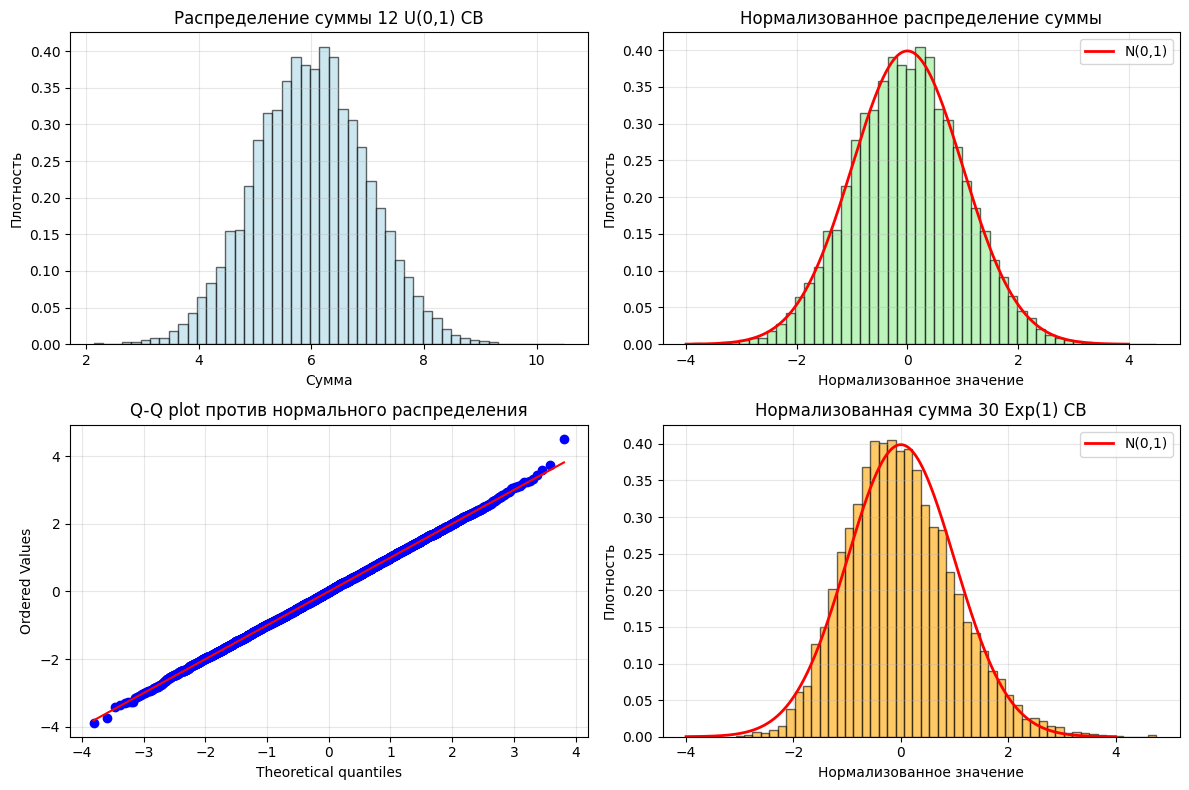


=== ЦЕНТРАЛЬНАЯ ПРЕДЕЛЬНАЯ ТЕОРЕМА ===
ЦПТ утверждает, что сумма большого количества независимых
одинаково распределенных случайных величин стремится к нормальному распределению.

Для суммы 12 U(0,1):
  - Теоретическое среднее: 6.0
  - Теоретическая дисперсия: 1.0
  - Выборочное среднее: 5.9970
  - Выборочная дисперсия: 0.9939


In [11]:
# Проверка центральной предельной теоремы
np.random.seed(42)
n_vars = 12  # количество суммируемых СВ
n_samples = 10000
sums = np.zeros(n_samples)

# Суммируем разные распределения
for i in range(n_samples):
    # Суммируем n_vars равномерно распределенных СВ
    uniform_vars = np.random.uniform(0, 1, n_vars)
    sums[i] = np.sum(uniform_vars)

# Нормализация (центрирование и нормирование)
sums_normalized = (sums - np.mean(sums)) / np.std(sums)

# Построение гистограммы суммы
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(sums, bins=50, density=True, alpha=0.6, color='lightblue', edgecolor='black')
plt.title(f'Распределение суммы {n_vars} U(0,1) СВ')
plt.xlabel('Сумма')
plt.ylabel('Плотность')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(sums_normalized, bins=50, density=True, alpha=0.6, color='lightgreen', edgecolor='black')
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', linewidth=2, label='N(0,1)')
plt.title('Нормализованное распределение суммы')
plt.xlabel('Нормализованное значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, alpha=0.3)

# Q-Q plot для проверки нормальности
plt.subplot(2, 2, 3)
stats.probplot(sums_normalized, dist="norm", plot=plt)
plt.title('Q-Q plot против нормального распределения')
plt.grid(True, alpha=0.3)

# Проверка для экспоненциального распределения
n_vars_exp = 30
sums_exp = np.zeros(n_samples)
for i in range(n_samples):
    exp_vars = np.random.exponential(1, n_vars_exp)
    sums_exp[i] = np.sum(exp_vars)

sums_exp_normalized = (sums_exp - np.mean(sums_exp)) / np.std(sums_exp)

plt.subplot(2, 2, 4)
plt.hist(sums_exp_normalized, bins=50, density=True, alpha=0.6, color='orange', edgecolor='black')
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', linewidth=2, label='N(0,1)')
plt.title(f'Нормализованная сумма {n_vars_exp} Exp(1) СВ')
plt.xlabel('Нормализованное значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== ЦЕНТРАЛЬНАЯ ПРЕДЕЛЬНАЯ ТЕОРЕМА ===")
print("ЦПТ утверждает, что сумма большого количества независимых")
print("одинаково распределенных случайных величин стремится к нормальному распределению.")
print(f"\nДля суммы {n_vars} U(0,1):")
print(f"  - Теоретическое среднее: {n_vars * 0.5}")
print(f"  - Теоретическая дисперсия: {n_vars / 12}")
print(f"  - Выборочное среднее: {np.mean(sums):.4f}")
print(f"  - Выборочная дисперсия: {np.var(sums):.4f}")

6. Критерий χ2 для проверки нормальности

=== ПРОВЕРКА НОРМАЛЬНОСТИ КРИТЕРИЕМ χ² ===

1. Нормальное распределение с правильными параметрами:
   χ² = 12.6510, df = 14, p-value = 0.5542
   Гипотеза о нормальности: НЕ отвергается (α=0.05)

2. Нормальное распределение с неправильными параметрами:
   χ² = 232.5621, df = 17, p-value = 0.0000
   Гипотеза о нормальности: Отвергается (α=0.05)

3. Равномерное распределение:
   χ² = 186.0600, df = 17, p-value = 0.0000
   Гипотеза о нормальности: Отвергается (α=0.05)

4. Экспоненциальное распределение:
   χ² = 1470.5046, df = 14, p-value = 0.0000
   Гипотеза о нормальности: Отвергается (α=0.05)


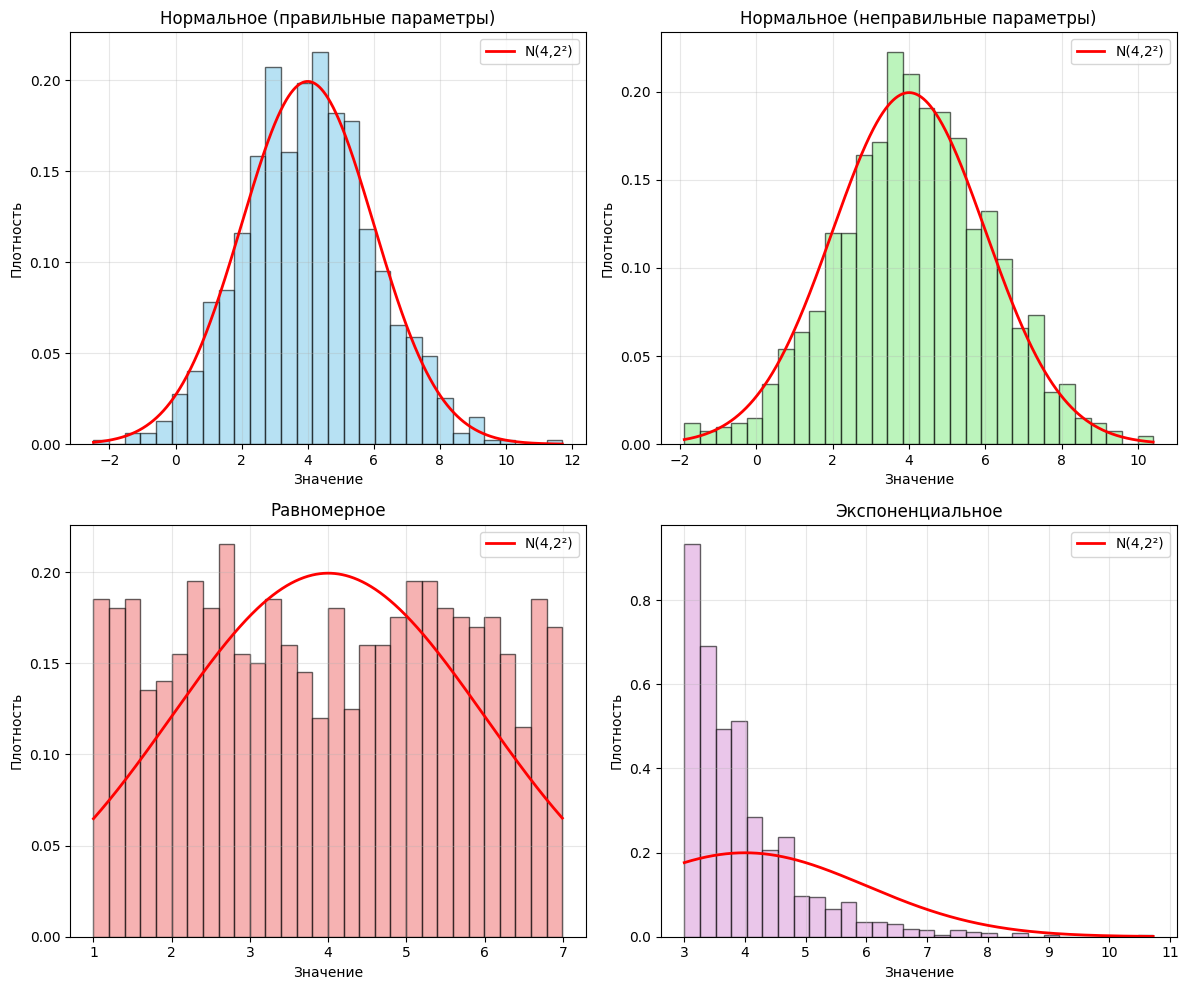


=== ВЫВОДЫ О РАБОТЕ КРИТЕРИЯ χ² ===
1. Критерий χ² правильно отвергает гипотезу о нормальности
   для явно ненормальных распределений (равномерное, экспоненциальное)
2. Критерий может не отвергать гипотезу, если параметры распределения
   указаны неверно (нужна оценка параметров по выборке)
3. Мощность критерия зависит от объема выборки и количества бинов
4. Рекомендуется использовать совместно с другими критериями
   (Колмогорова-Смирнова, Шапиро-Уилка)


In [12]:
# Проверка гипотезы о нормальном распределении с помощью критерия χ²
from scipy.stats import chi2_contingency

def chi2_test_normality(data, mu, sigma, bins=20):
    """Проверка нормальности с помощью критерия χ²"""
    # Создание бинов
    observed, bin_edges = np.histogram(data, bins=bins)

    # Ожидаемые частоты для нормального распределения
    expected = []
    for i in range(len(bin_edges) - 1):
        prob = (stats.norm.cdf(bin_edges[i+1], mu, sigma) -
                stats.norm.cdf(bin_edges[i], mu, sigma))
        expected.append(prob * len(data))

    # Объединение бинов с малыми ожидаемыми частотами
    observed_adj = []
    expected_adj = []

    i = 0
    while i < len(expected):
        if expected[i] < 5:
            # Объединяем с соседним
            if i == len(expected) - 1:
                # Если последний, объединяем с предыдущим
                observed_adj[-1] += observed[i]
                expected_adj[-1] += expected[i]
            else:
                # Объединяем со следующим
                obs_sum = observed[i] + observed[i+1]
                exp_sum = expected[i] + expected[i+1]
                observed_adj.append(obs_sum)
                expected_adj.append(exp_sum)
                i += 1  # Пропускаем следующий, так как уже объединили
        else:
            observed_adj.append(observed[i])
            expected_adj.append(expected[i])
        i += 1

    observed_adj = np.array(observed_adj)
    expected_adj = np.array(expected_adj)

    # Вычисление статистики χ²
    chi2_stat = np.sum((observed_adj - expected_adj)**2 / expected_adj)
    df = len(observed_adj) - 1 - 2  # степень свободы: количество бинов - 1 - количество параметров
    p_value = 1 - chi2.cdf(chi2_stat, df)

    return chi2_stat, df, p_value

# Проверка для разных распределений
np.random.seed(42)

# 1. Нормальное распределение с правильными параметрами
data_norm_correct = np.random.normal(mu, sigma, 1000)
chi2_stat1, df1, p1 = chi2_test_normality(data_norm_correct, mu, sigma)

# 2. Нормальное распределение с неправильными параметрами
data_norm_wrong = np.random.normal(mu, sigma, 1000)
chi2_stat2, df2, p2 = chi2_test_normality(data_norm_wrong, mu + 1, sigma * 1.5)

# 3. Равномерное распределение
data_uniform = np.random.uniform(mu - 3, mu + 3, 1000)
chi2_stat3, df3, p3 = chi2_test_normality(data_uniform, mu, sigma)

# 4. Экспоненциальное распределение
data_exponential = np.random.exponential(1, 1000) + mu - 1
chi2_stat4, df4, p4 = chi2_test_normality(data_exponential, mu, sigma)

print("=== ПРОВЕРКА НОРМАЛЬНОСТИ КРИТЕРИЕМ χ² ===")
print("\n1. Нормальное распределение с правильными параметрами:")
print(f"   χ² = {chi2_stat1:.4f}, df = {df1}, p-value = {p1:.4f}")
print(f"   Гипотеза о нормальности: {'НЕ отвергается' if p1 > 0.05 else 'Отвергается'} (α=0.05)")

print("\n2. Нормальное распределение с неправильными параметрами:")
print(f"   χ² = {chi2_stat2:.4f}, df = {df2}, p-value = {p2:.4f}")
print(f"   Гипотеза о нормальности: {'НЕ отвергается' if p2 > 0.05 else 'Отвергается'} (α=0.05)")

print("\n3. Равномерное распределение:")
print(f"   χ² = {chi2_stat3:.4f}, df = {df3}, p-value = {p3:.4f}")
print(f"   Гипотеза о нормальности: {'НЕ отвергается' if p3 > 0.05 else 'Отвергается'} (α=0.05)")

print("\n4. Экспоненциальное распределение:")
print(f"   χ² = {chi2_stat4:.4f}, df = {df4}, p-value = {p4:.4f}")
print(f"   Гипотеза о нормальности: {'НЕ отвергается' if p4 > 0.05 else 'Отвергается'} (α=0.05)")

# Визуализация распределений для сравнения
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
distributions = [
    (data_norm_correct, 'Нормальное (правильные параметры)', 'skyblue'),
    (data_norm_wrong, 'Нормальное (неправильные параметры)', 'lightgreen'),
    (data_uniform, 'Равномерное', 'lightcoral'),
    (data_exponential, 'Экспоненциальное', 'plum')
]

for idx, (data, title, color) in enumerate(distributions):
    ax = axes[idx // 2, idx % 2]
    ax.hist(data, bins=30, density=True, alpha=0.6, color=color, edgecolor='black')

    # Наложение нормальной кривой с предполагаемыми параметрами
    x = np.linspace(np.min(data), np.max(data), 1000)
    pdf = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, pdf, 'r-', linewidth=2, label=f'N({mu},{sigma}²)')

    ax.set_title(title)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Плотность')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== ВЫВОДЫ О РАБОТЕ КРИТЕРИЯ χ² ===")
print("1. Критерий χ² правильно отвергает гипотезу о нормальности")
print("   для явно ненормальных распределений (равномерное, экспоненциальное)")
print("2. Критерий может не отвергать гипотезу, если параметры распределения")
print("   указаны неверно (нужна оценка параметров по выборке)")
print("3. Мощность критерия зависит от объема выборки и количества бинов")
print("4. Рекомендуется использовать совместно с другими критериями")
print("   (Колмогорова-Смирнова, Шапиро-Уилка)")